# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [31]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline

# 設定 data_path
dir_data = 'D:/marathon/HW/data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [25]:
app_train['YEARS_BIRTH_Q']=pd.qcut(app_train['DAYS_BIRTH']/365,4)
app_train['YEARS_BIRTH']=pd.cut(app_train['DAYS_BIRTH']/365,4)
print('qcut \n',app_train['YEARS_BIRTH_Q'].value_counts().sort_index())
print('cut \n',app_train['YEARS_BIRTH'].value_counts().sort_index())
#print(app_train[['YEARS_BIRTH','AMT_INCOME_TOTAL']])

app_train_group = app_train.groupby('YEARS_BIRTH_Q').mean()
print(app_train_group.sort_index())

qcut 
 (20.517, 34.008]    76884
(34.008, 43.151]    76877
(43.151, 53.923]    76887
(53.923, 69.121]    76863
Name: YEARS_BIRTH_Q, dtype: int64
cut 
 (20.469, 32.668]     66536
(32.668, 44.819]    100808
(44.819, 56.97]      84685
(56.97, 69.121]      55482
Name: YEARS_BIRTH, dtype: int64
                     SK_ID_CURR    TARGET  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  \
YEARS_BIRTH_Q                                                                 
(20.517, 34.008]  277607.893190  0.109932            0.128258      0.383006   
(34.008, 43.151]  278456.376901  0.086580            0.096024      0.402838   
(43.151, 53.923]  278320.374706  0.073250            0.087596      0.349240   
(53.923, 69.121]  278337.492044  0.053147            0.068967      0.225323   

                  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
YEARS_BIRTH_Q                                                       
(20.517, 34.008]         0.616617      0.588861     165777.552243   
(34.008, 43.151]         0.

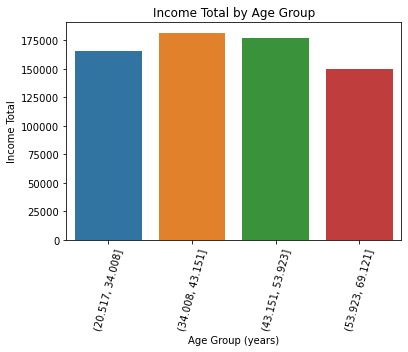

In [33]:
px = np.sort(app_train['YEARS_BIRTH_Q'].unique())
py = app_train_group['AMT_INCOME_TOTAL']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Income Total')
plt.title('Income Total by Age Group');